### Binome
- Amine YOUCEF KHODJA
- Amayas SADI

# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [22]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [23]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    return fftshift(np.abs(If))

def toVisualizeLogFT(If):
    return np.log( 1 + np.abs(If))

def thresholdImage(I,s):
    """ Array*int -> Array """
    
    res = np.where(I < s, 0, 255)
    
    return res

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

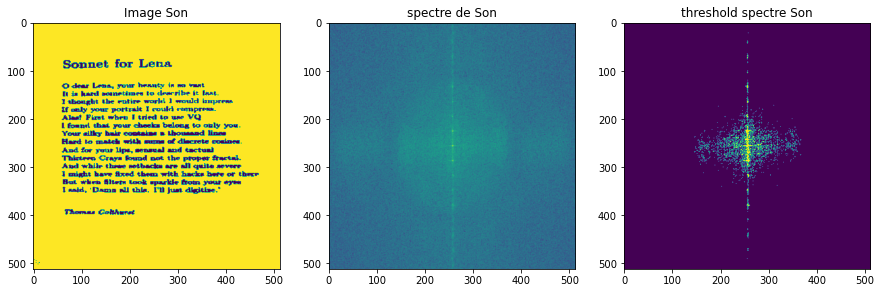

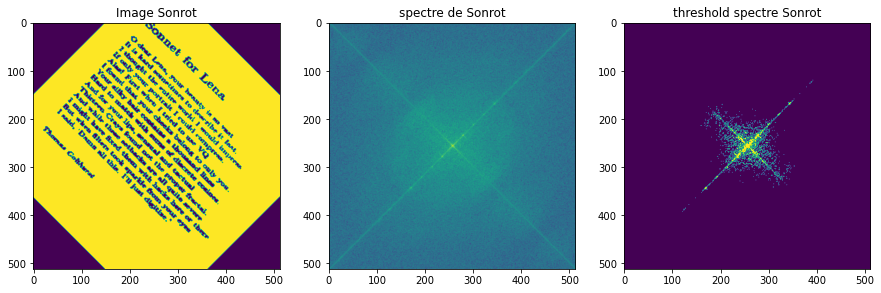

In [24]:
import matplotlib.pyplot as plt

# Son
plt.figure(figsize=(15,15))

son_IF = computeFT(son)
spc_son = toVisualizeLogFT(son_IF)
plt.subplot(231)
plt.title("Image Son")
plt.imshow(son)

plt.subplot(232)
plt.title("spectre de Son")
plt.imshow(fftshift(spc_son))

son_th = thresholdImage(np.abs(son_IF),1e5)
plt.subplot(233)
plt.title("threshold spectre Son")
plt.imshow(fftshift((son_th)))

plt.show()

# SonRot
plt.figure(figsize=(15,15))

sonrot_IF = computeFT(sonrot)
spc_sonrot = toVisualizeLogFT(sonrot_IF)
plt.subplot(231)
plt.title("Image Sonrot")
plt.imshow(sonrot)

plt.subplot(232)
plt.title("spectre de Sonrot")
plt.imshow(fftshift(spc_sonrot))


sonrot_th = thresholdImage(np.abs(sonrot_IF),1e5)
plt.subplot(233)
plt.title("threshold spectre Sonrot")
plt.imshow(fftshift(sonrot_th))

plt.show()

3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

### Interpretation
le threshold FT est illuminé uniquement sur les parties fortes du spectre.
Et on remarque qu'en faisant une rotation d'angle θ sur l'image , le meme angle sera appliqué sur son domaine frequentiel . 

- proprieté : 
Une rotation d'angle θ dans le domaine spatial induit la même rotation dans le domaine fréquentiel.

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [25]:
def blend(I1,I2,alpha):
    return alpha*I1 + (1 - alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

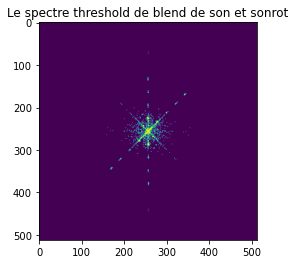

In [26]:
blend_son = blend(son,sonrot,0.5)
blend_son_IF = computeFT(blend_son)
blend_son_th = thresholdImage(np.abs(blend_son_IF),1e5)

plt.title("Le spectre threshold de blend de son et sonrot")
plt.imshow(fftshift(blend_son_th))
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

### Interpretation 
- le spectre du blended est moins illuminé que les deux originaux mais reste un melange des deux spectres ponderés par un parametre 𝛼 et 1-𝛼 respectivement .

- Ponderer un domaine de frequence restera un domaine de frequence .
  La somme de deux domaine de frequence donnera un domaine de frequence.

- Quand 𝛼 est proche de 0 le spectre produit tendera vers le spectre de l'image donnée en deuxieme argument et
  Quand 𝛼 est proche de 1 le spectre produit tendera vers le spectre de l'image donnée en premier argument
  Entre 0 et 1 un melange dense se produira

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [27]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))


def rectifyOrientation(I):
    
    I_IF = computeFT(I)
    I_IF_th = thresholdImage(np.abs(I_IF),3*1e5)

    I_ORI , D_ORI = mainOrientation(I_IF_th)
    return rotateImage(I, - D_ORI)

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

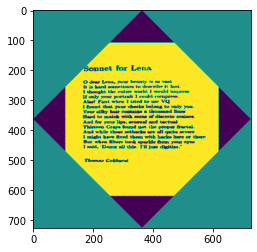

In [28]:
plt.imshow(rectifyOrientation(sonrot))
plt.show()

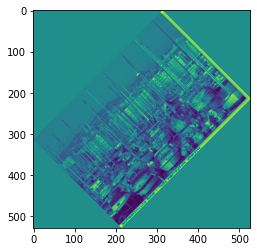

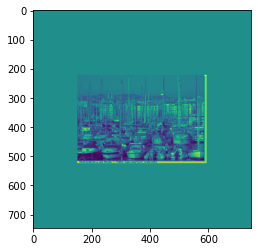

In [29]:
port = np.array(Image.open('img/port.jpg'))
port = rotateImage(port, 45)

plt.imshow(port)
plt.show()

plt.imshow(rectifyOrientation(port))
plt.show()